Prva stvar koju ćemo uraditi jeste da ćemo grafički da prikažemo naš trapez koji slikamo u pravougaonik.    
Naš problem koji rešavamo jeste pronalazak matrice projektivnog preslikavanja preko različitih algoritama.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw(original, product):
    xs = [p[0] for p in original]
    ys = [p[1] for p in original]
    xs.append(original[0][0])
    ys.append(original[0][1])

    xd = [p[0] for p in product]
    yd = [p[1] for p in product]
    xd.append(product[0][0])
    yd.append(product[0][1])

    plt.plot(xs, ys)
    plt.plot(xd, yd)
    plt.legend(['original', 'slika'])
    plt.show()

In [3]:
# originalne tacke
original_points = [[-3, -1, 1],
                    [3, -1, 1],
                    [1, 1, 1],
                    [-1, 1, 1]]

# slike tacaka
product_points = [[-2, -1, 1],
                  [2, -1, 1],
                  [2, 1, 1],
                  [-2, 1, 1]]


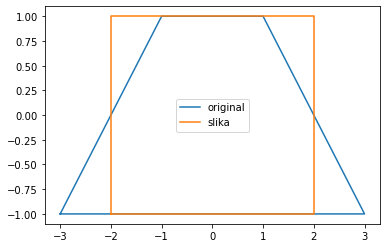

In [4]:
# Graficki prikaz
draw(original_points, product_points)

Takodje unela sam i svoje tačke 
da bi se videlo da kod radi i na mojim test primerima kao i na unapred zadatim tačkama.

In [5]:
my_original_points = [[-2, -1, 1],
                      [2, -1, 1],
                      [1, 1, 1],
                      [-1, 1, 1]]

my_product_points  = [[-1, -1, 1],
                      [1, -1, 1],
                      [1, 1, 1],
                      [-1, 1, 1]]

# Naivni algoritam

D = gamma1*A + gamma2*B + gamma2*C


P = P2*inv(P1)

In [6]:
def find_matrix(x):
    matrix = np.array([
        [x[0][0], x[1][0], x[2][0]],
        [x[0][1], x[1][1], x[2][1]],
        [x[0][2], x[1][2], x[2][2]]
    ])

    D = np.array([x[3][0], x[3][1], x[3][2]])

    result = np.linalg.solve(matrix, D)

    gamma1 = result[0]
    gamma2 = result[1]
    gamma3 = result[2]

    column1= np.array([gamma1*x[0][0], gamma1*x[0][1], gamma1*x[0][2]])
    column2= np.array([gamma2*x[1][0], gamma2*x[1][1], gamma2*x[1][2]])
    column3= np.array([gamma3*x[2][0], gamma3*x[2][1], gamma3*x[2][2]])

    P = np.column_stack([column1, column2, column3])

    return P

def naive_algorithm(original, product):

    P1 = find_matrix(original)
    P2 = find_matrix(product)

    P = np.dot(P2, np.linalg.inv(P1))

    return P


In [7]:
P_naive = naive_algorithm(original_points, product_points)
P_my_naive=naive_algorithm(my_original_points, my_product_points)
P_naive = P_naive.round(5)
P_my_naive= P_my_naive.round(5)
print("Matrica projektivnog preslikavanja dobijena naivnim algoritmom:")
print(P_naive)
print("\n")
print("Matrica projektivnog preslikavanja dobijena naivnim algoritmom(moje koordinate):")
print(P_my_naive)

Matrica projektivnog preslikavanja dobijena naivnim algoritmom:
[[ 2. -0.  0.]
 [-0.  2. -1.]
 [ 0. -1.  2.]]


Matrica projektivnog preslikavanja dobijena naivnim algoritmom(moje koordinate):
[[ 1.   0.   0. ]
 [ 0.   1.5 -0.5]
 [ 0.  -0.5  1.5]]


# DLT algoritam

In [8]:
def dlt(original, product):
    x = original[0][0]
    y = original[0][1]
    z = original[0][2]

    xp = product[0][0]
    yp = product[0][1]
    zp = product[0][2]

    A = np.array([
        [   0,    0,    0, -zp*x, -zp*y, -zp*z,  yp*x,  yp*y,  yp*z],
        [zp*x, zp*y, zp*z,     0,     0,     0, -xp*x, -xp*y, -xp*z]
    ])

    for i in range(1, len(original)):
        x = original[i][0]
        y = original[i][1]
        z = original[i][2]

        xp = product[i][0]
        yp = product[i][1]
        zp = product[i][2]

        row1 = np.array([0, 0, 0, -zp*x, -zp*y, -zp*z, yp*x, yp*y, yp*z])
        row2 = np.array([zp*x, zp*y, zp*z, 0, 0, 0, -xp*x, -xp*y, -xp*z])

        A = np.vstack((A, row1))
        A = np.vstack((A, row2))

    M, N, L = np.linalg.svd(A)

    P = L[-1].reshape(3,3)
    
    return P

In [9]:
P_dlt = dlt(original_points, product_points)
P_my_dlt=dlt(my_original_points, my_product_points)
print("Matrica projektivnog preslikavanja dobijena DLT algoritmom:")
print(P_dlt.round(5))
print("\n")
print("Matrica projektivnog preslikavanja dobijena DLT algoritmom(moje koordinate):")
print(P_my_dlt.round(5))

Matrica projektivnog preslikavanja dobijena DLT algoritmom:
[[ 0.53452  0.      -0.     ]
 [-0.       0.53452 -0.26726]
 [-0.      -0.26726  0.53452]]


Matrica projektivnog preslikavanja dobijena DLT algoritmom(moje koordinate):
[[ 0.40825 -0.       0.     ]
 [ 0.       0.61237 -0.20412]
 [ 0.      -0.20412  0.61237]]


# Poredjenje DLT i naivnog algoritma

In [10]:
P_dlt = (P_dlt / P_dlt[0, 0]) * P_naive[0, 0]
print("Poredjenje DLT i naivnog algoritma(zadate koordinate):")
print(P_dlt.round(5))
print("\n")

P_my_dlt = (P_my_dlt / P_my_dlt[0, 0]) * P_my_naive[0, 0]
print("Poredjenje DLT i naivnog algoritma(moje koordinate):")
print(P_my_dlt.round(5))


Zadate koordinate:
[[ 2.  0. -0.]
 [-0.  2. -1.]
 [-0. -1.  2.]]


Moje koordinate:
[[ 1.  -0.   0. ]
 [ 0.   1.5 -0.5]
 [ 0.  -0.5  1.5]]


Kao sto vidimo dobili smo istu matricu kao i preko naivnog algoritma ali cisto da proverimo da li su stvarno iste

In [11]:
print("Zadate koordinate:")
P_dlt.round(5) == P_naive.round(5)
print("Moje koordinate:")
P_my_dlt.round(5) == P_my_naive.round(5)

Zadate koordinate:
Moje koordinate:


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Dakle i sa već zadatim koordinatama i mojim koordinatama matrice su iste.

# Modifikovani DLT algoritam

-računanje afinog težišta sistema.               
-traslacija dobijenog težišta u koordinatni početak.             
p -prosecno rastojanje transliranih koordinata od koordinatnog početka            
S- homotetija sa faktorom koren iz 2 kroz p

In [12]:
def normalization(original):
    x = sum([p[0]/p[2] for p in original]) / len(original)
    y = sum([p[1]/p[2] for p in original]) / len(original)

    p = 0.0

    for i in range(len(original_points)):
        tmp1 = float(original_points[i][0]/original[i][2]) - x
        tmp2 = float(original_points[i][1]/original[i][2]) - y

        p = p + math.sqrt(tmp1**2 + tmp2**2)

    p = p / float(len(original_points))

    S = float(math.sqrt(2)) / p

    return np.array([[S, 0, -S*x], [0, S, -S*y], [0, 0, 1]])

def dlt_normalized(original,product):

    T = normalization(original)
    Tp = normalization(product)

    M_line = T.dot(np.transpose(original))
    Mp = Tp.dot(np.transpose(product))

    M_line = np.transpose(M_line)
    Mp = np.transpose(Mp)

    P_line = dlt(M_line, Mp)

    P = (np.linalg.inv(Tp)).dot(P_line).dot(T)

    return P

In [13]:
P_dlt_normalized = dlt_normalized(original_points,product_points)
print("Modifikovani DLT algoritam(zadate koordinate):")
print(P_dlt_normalized.round(5))
print("\n")

P_my_dlt_normalized = dlt_normalized(my_original_points, my_product_points)
print("Modifikovani DLT algoritam((moje koordinate):")print(P_my_dlt_normalized.round(5))

Zadate koordinate:
[[ 0.5164 -0.     -0.    ]
 [ 0.      0.5164 -0.2582]
 [-0.     -0.2582  0.5164]]


Moje koordinate:
[[ 0.4 -0.   0. ]
 [-0.   0.6 -0.2]
 [ 0.  -0.2  0.6]]


# Poredjenje modifikovanog DLT algoritma i DLT algoritma

In [14]:
P_dlt_normalized = (P_dlt_normalized / P_dlt_normalized[0, 0]) * P_dlt[0, 0]
print("Poredjenje modifikovanog DLT algoritma i DLT algoritma(zadate koordinate):")
print(P_dlt_normalized.round(5))
print("\n")

P_my_dlt_normalized = (P_my_dlt_normalized / P_my_dlt_normalized[0, 0]) * P_my_dlt[0, 0]
print("Poredjenje modifikovanog DLT algoritma i DLT algoritma(moje koordinate):")
print(P_my_dlt_normalized.round(5))

Zadate koordinate:
[[ 2. -0. -0.]
 [ 0.  2. -1.]
 [-0. -1.  2.]]


Moje koordinate:
[[ 1.  -0.   0. ]
 [-0.   1.5 -0.5]
 [ 0.  -0.5  1.5]]


In [15]:
print("Zadate koodinate:")
P_dlt_normalized.round(5) == P_dlt.round(5)

print("Moje koodinate:")
P_my_dlt_normalized.round(5) == P_my_dlt.round(5)

Zadate koodinate:
Moje koodinate:


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Dakle i sa već zadatim koordinatama i mojim koordinatama matrice su iste.                      
Ne zavisi od promene koordinata!!!

# DLT sa vise korespodencija

In [16]:
original_cor = [[-3, -1, 1],
              [3, -1, 1],
              [1, 1, 1],
              [-1, 1, 1],
              [1, 2, 3],
              [-8, -2, 1]]

product_cor = [[-2, -1, 1],
              [2, -1, 1],
              [2, 1, 1],
              [-2, 1, 1],
              [2, 1, 4],
              [-16, -5, 4]]

In [17]:
print("DLT sa vise od 4 korespodencije:")
P_dlt_new = dlt(original_cor,product_cor)
print(P_dlt_new.round(5))
print("\n")

print("Poredjenje sa naivnim algoritmom:")
P_dlt_new = (P_dlt_new / P_dlt_new[0, 0]) * P_naive[0, 0]
print(P_dlt_new.round(5))
print("\n")

print("Potvrda da je preslikavanje isto:")
print(P_dlt_new.round(5) == P_naive.round(5))

DLT sa vise od 4 korespodencije:
[[-0.53452  0.      -0.     ]
 [ 0.      -0.53452  0.26726]
 [-0.       0.26726 -0.53452]]


Poredjenje sa naivnim algoritmom:
[[ 2. -0.  0.]
 [-0.  2. -1.]
 [ 0. -1.  2.]]


Potvrda da je preslikavanje isto:
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [18]:
print("Modifikovani DLT za vise od 4 korespodencije:")
P_dlt_norm_new = dlt_normalized(original_cor,product_cor)
print(P_dlt_norm_new.round(5))
print("\n")

print("Poredjenje sa naivnim algoritmom:")
P_dlt_norm_new = (P_dlt_norm_new / P_dlt_norm_new[0, 0]) * P_naive[0, 0]
print(P_dlt_new.round(5))
print("\n")

print("Potvrda da je preslikavanje isto:")
print(P_dlt_norm_new.round(5) == P_naive.round(5))

Modifikovani DLT za vise od 4 korespodencije:
[[ 0.47316  0.      -0.     ]
 [ 0.       0.47316 -0.23658]
 [-0.      -0.23658  0.47316]]


Poredjenje sa naivnim algoritmom:
[[ 2. -0.  0.]
 [-0.  2. -1.]
 [ 0. -1.  2.]]


Potvrda da je preslikavanje isto:
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


# Promena koordinata kod DLT algoritma

In [19]:
def change_coordinates():

    C1 = np.array([[0, 1, 2], 
                   [-1, 0, 3], 
                   [0, 0, 1]])
    
    C2 = np.array([[1, -1, 5], 
                   [1, 1, -2], 
                   [0, 0, 1]])

    new_original_points = []
    new_product_points = []

    # nove tacke
    for i in range(len(original_points)):
        new_original_points.append(np.dot(C1, original_points[i]))
        new_product_points.append(np.dot(C2, product_points[i]))
 
    new_original_points = np.array(new_original_points)
    new_product_points = np.array(new_product_points)

    # DLT algoritam
    P_dlt = dlt(original_points, product_points) 
    P_dlt_new = dlt(new_original_points, new_product_points)
  
    P_tmp = np.dot(np.linalg.inv(C2), P_dlt_new)
    P_tmp = np.dot(P_tmp, C1)
    P_tmp = (P_dlt[0] / P_tmp[0]) * P_tmp
    
    print("Poredjenje DLT algoritma nakon promene koordinata: ")
    print(P_dlt.round(5) == P_tmp.round(5))
    
        
#     P_dlt_norm = dlt_normalized(original_points, product_points)
#     P_dlt_norm_new = dlt_normalized(new_original_points,new_product_points)

#     P_tmp = np.dot(np.linalg.inv(C2), P_dlt_norm_new)
#     P_tmp = np.dot(P_tmp, C1)
    
#     print("Poredjenje modifikovanog DLT algoritma nakon promene koordinata: ")
#     print(P_dlt_norm.round(5) == P_tmp.round(5))

In [20]:
change_coordinates()

Poredjenje DLT algoritma nakon promene koordinata: 
[[ True  True  True]
 [ True False False]
 [ True False False]]


Iz nekog razloga nisam mogla da dobijem da se dobije ista matrica kada se poredi modifikovani DLT nakon promene koordinata
Stvarno sam sve pokusala i ne znam koju gresku pravim i gde imam previde necega              
Svakako sam taj deo koda napisala i stavila pod komentare i nadam se da to ne odnosi puno poena haah :)

# 4) Uklanjanje projektivne distorzije

In [21]:
import cv2

In [22]:
def distortion():
    img = cv2.imread("zgrada.png", cv2.IMREAD_COLOR)

    plt.imshow(img)
    plt.show()
   
    img_copy = np.copy(img)
    img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)

    # REDOSLED gore levo,gore desno,dole desno,dole levo
    A = [[136,106,1],
         [240,6,1],
         [240,490,1],
         [140,400,1]]

    Ap = [[30,0,1],
          [400, 0, 1],
          [400, 400,1],
          [0, 400,1]]
   
    M = naive_algorithm(A,Ap)
    out = cv2.warpPerspective(img,M,(700,400),flags=cv2.INTER_LINEAR)
    plt.imshow(out)
    plt.show()

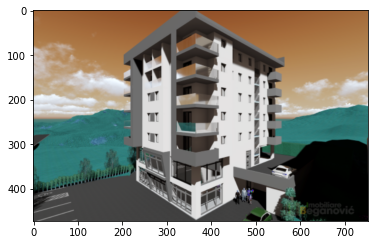

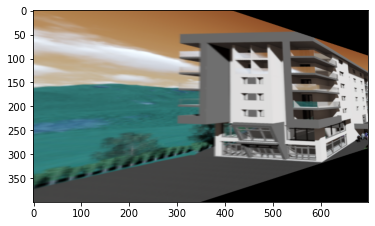

In [23]:
distortion()

# 4.1) Panorama

In [24]:
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)

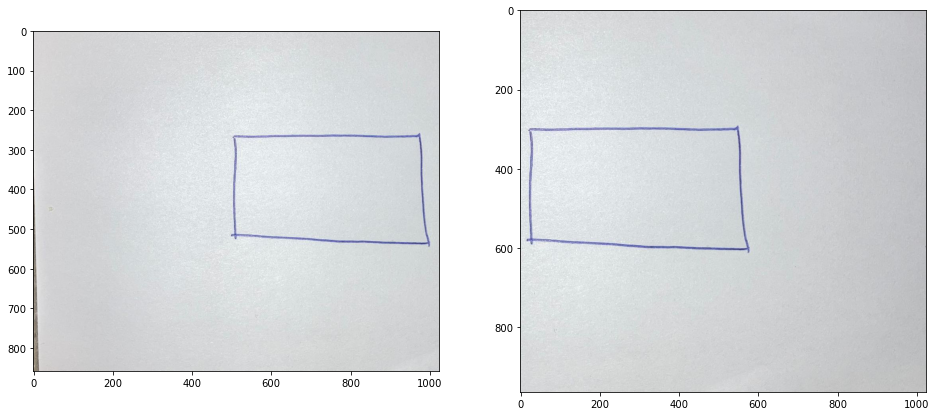

In [33]:
img2 = imageio.imread('desna.jpeg')
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

img1 = imageio.imread('leva.jpeg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(img1, cmap="gray")
ax2.imshow(img2, cmap="gray")

plt.show()

In [34]:
descriptor = cv2.xfeatures2d.SIFT_create()

kpA, featuresA = descriptor.detectAndCompute(img2_gray, mask=None)
kpB, featuresB = descriptor.detectAndCompute(img1_gray, mask=None)

Pronalazenje zajednickih tacki

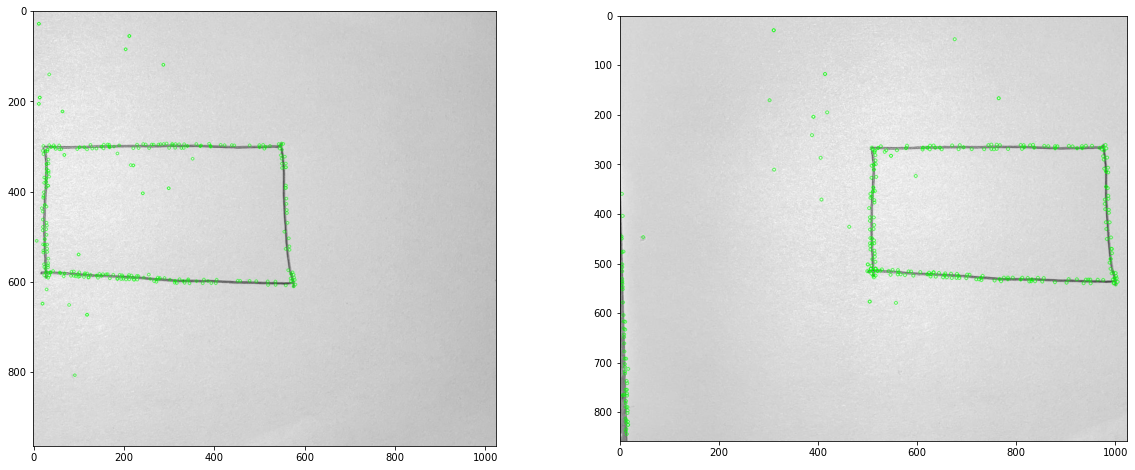

In [35]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(img2_gray, kpA, None, color=(0,255,0)))
ax2.imshow(cv2.drawKeypoints(img1_gray, kpB, None, color=(0,255,0)))

plt.show()

Spajanje tih tacaka

In [36]:
def bf_match(featuresA, featuresB):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        
    best_matches = bf.match(featuresA, featuresB)
    
    rawMatches = sorted(best_matches, key = lambda x:x.distance)

    return rawMatches

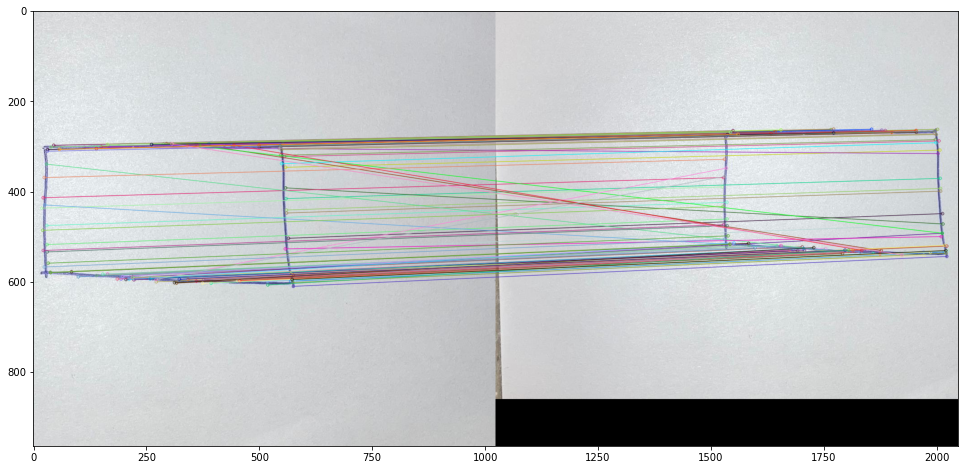

In [37]:
fig = plt.figure(figsize=(20,8))

matches = bf_match(featuresA, featuresB)

img3 = cv2.drawMatches(img2, kpA, img1, kpB, matches[:100], None,
                       flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

RANSAC algoritam

In [38]:
def homography(kpA, kpB, featuresA, featuresB, matches, reprojThresh):
    
    kpA = np.float32([kp.pt for kp in kpA])
    kpB = np.float32([kp.pt for kp in kpB])
    
    if len(matches) > 4:
        ptsA = np.float32([kpA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpB[m.trainIdx] for m in matches])
        
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,reprojThresh)

        return (matches, H, status)
    else:
        return None

In [39]:
(_, H, _) = homography(kpA, kpB, featuresA, featuresB, matches, reprojThresh=4)
print(H.round(1))

[[  0.9  -0.  484.7]
 [  0.    0.9  -0.6]
 [  0.   -0.    1. ]]


Spajanje u panoramu

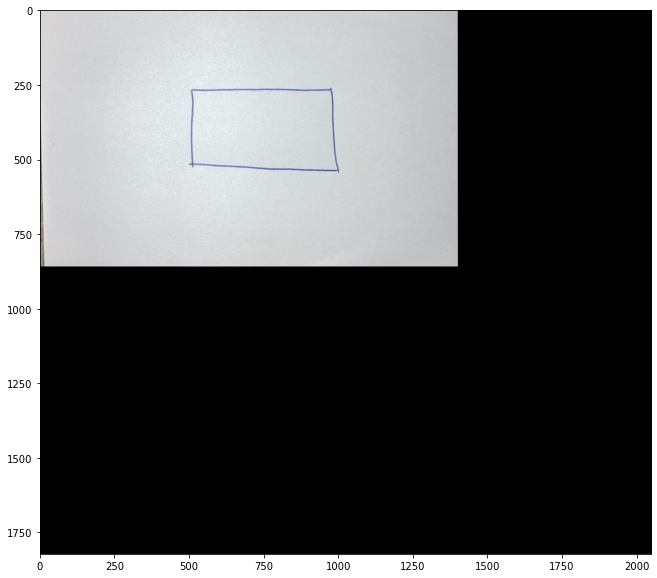

In [40]:
width = img2.shape[1] + img1.shape[1]
height = img2.shape[0] + img1.shape[0]

res = cv2.warpPerspective(img2, H, (width, height))
res[0:img1.shape[0], 0:img1.shape[1]] = img1

plt.figure(figsize=(20,10))
plt.imshow(res)

plt.show()

Uklanjanje viska crnog u rezultatu

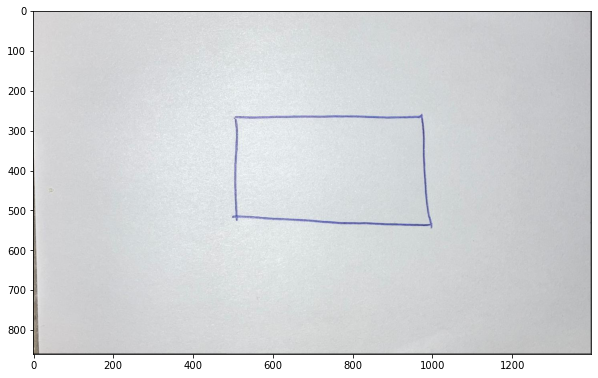

In [41]:
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

c = max(cnts, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(c)

res = res[y:y + h, x:x + w]

plt.figure(figsize=(10,10))
plt.imshow(res)

# Komentar
Kodovi za panoramu i uklanjanje distorzije su produkt trazenja razlicitih funkcija i delova kodova
sa interneta.       
Poprilicno je napredno sve ovo i smatram da mi nismo toliko potkovani znanjem iz bilo kod programskog jezika da znamo neke ovakve fje tako da znate da sam dosta toga nasla na netu.